<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [3]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 9, 30)


In [4]:
#Get the stock quote
data = yf.download('AAPL', start=start_date, end=end_date)
#df = web.DataReader('AAPL', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.096443,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.376083,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.960770,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.612923,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.797081,132079200
...,...,...,...,...,...,...
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.257874,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.170990,93251400
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.236893,121434600


In [5]:
#Get the number of rows and columns in the data set
data.shape



(440, 6)

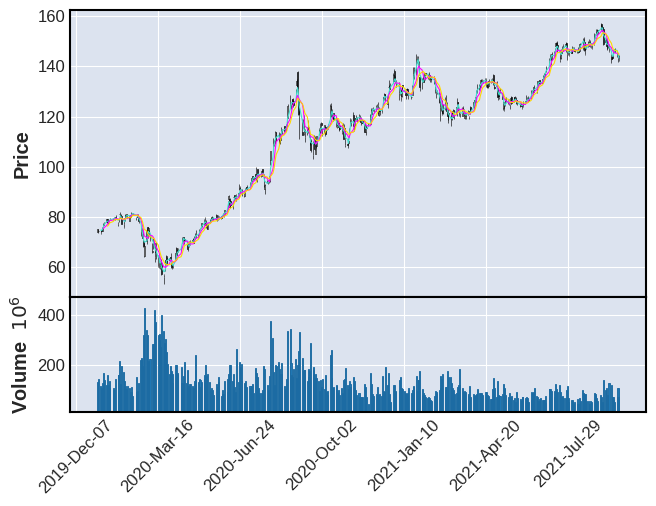

In [6]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [7]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

352

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.18882181],
       [0.18156514],
       [0.18745493],
       [0.18395094],
       [0.19587963],
       [0.21188401],
       [0.21362357],
       [0.23010013],
       [0.21946369],
       [0.2161336 ],
       [0.22582567],
       [0.2344989 ],
       [0.22913096],
       [0.2319392 ],
       [0.23574148],
       [0.2334551 ],
       [0.21019413],
       [0.23191432],
       [0.24844056],
       [0.24727254],
       [0.2115858 ],
       [0.20947341],
       [0.23479711],
       [0.24125851],
       [0.25060263],
       [0.23772957],
       [0.24150697],
       [0.23668577],
       [0.25554813],
       [0.24975769],
       [0.24995654],
       [0.23516986],
       [0.24665125],
       [0.23840053],
       [0.22038318],
       [0.183429  ],
       [0.15832896],
       [0.16968612],
       [0.12214516],
       [0.12174753],
       [0.18499466],
       [0.1614106 ],
       [0.19476128],
       [0.17035716],
       [0.16068988],
       [0.10387936],
       [0.15151967],
       [0.126

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.18882181, 0.18156514, 0.18745493, 0.18395094, 0.19587963,
       0.21188401, 0.21362357, 0.23010013, 0.21946369, 0.2161336 ,
       0.22582567, 0.2344989 , 0.22913096, 0.2319392 , 0.23574148,
       0.2334551 , 0.21019413, 0.23191432, 0.24844056, 0.24727254,
       0.2115858 , 0.20947341, 0.23479711, 0.24125851, 0.25060263,
       0.23772957, 0.24150697, 0.23668577, 0.25554813, 0.24975769,
       0.24995654, 0.23516986, 0.24665125, 0.23840053, 0.22038318,
       0.183429  , 0.15832896, 0.16968612, 0.12214516, 0.12174753,
       0.18499466, 0.1614106 , 0.19476128, 0.17035716, 0.16068988,
       0.10387936, 0.15151967, 0.12689181, 0.05929571, 0.13320412,
       0.04433512, 0.07080197, 0.05541888, 0.05072194, 0.01210271,
       0.        , 0.05594078, 0.05256097, 0.08466912, 0.05807801])]
[0.07564800649439885]



In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(292, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [12]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

292/292 [==============================] - 10s 23ms/step - loss: 0.0083


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

8.123248793862082

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


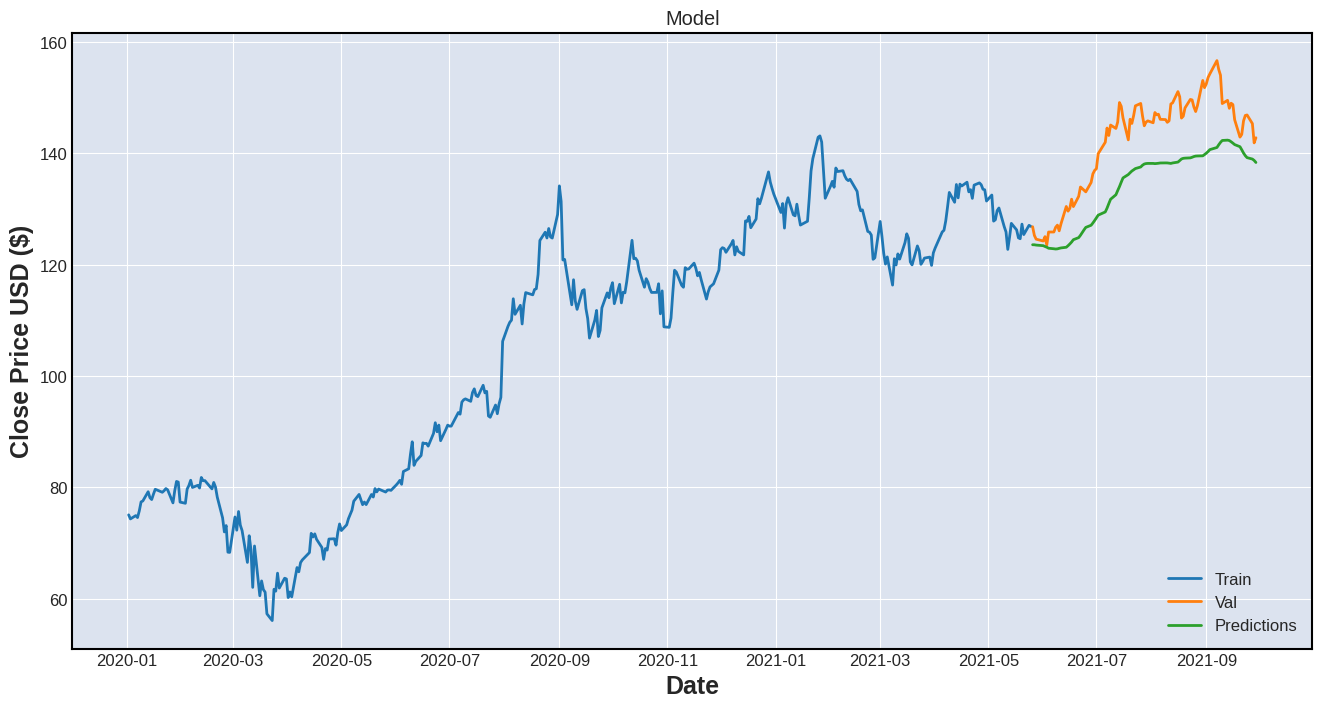

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [19]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-05-26,126.849998,123.607178
2021-05-27,125.279999,123.601906
2021-05-28,124.610001,123.547203
2021-06-01,124.279999,123.440163
2021-06-02,125.059998,123.292709
...,...,...
2021-09-23,146.830002,139.607635
2021-09-24,146.919998,139.255463
2021-09-27,145.369995,139.000626


In [20]:
#get the quote
apple_quote = yf.download('AAPL', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[138.01431]]
